In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
wine = load_wine()
wine_std = StandardScaler().fit_transform(wine.data)

In [3]:
wine.data.shape

(178, 13)

## 차원축소
- 13차원 -> 2차원, 4차원, 6차원

### 2차원

In [4]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
w_pca2 = pca2.fit_transform(wine_std)
w_pca2[:3]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ]])

In [6]:
pca2.explained_variance_ratio_, pca2.explained_variance_ratio_.sum()

(array([0.36198848, 0.1920749 ]), 0.5540633835693534)

- 4차원


In [10]:
pca4 = PCA(n_components=4)
w_pca4 = pca4.fit_transform(wine_std)
print(w_pca4[:3])
pca4.explained_variance_ratio_, pca4.explained_variance_ratio_.sum()

[[ 3.31675081 -1.44346263 -0.16573904 -0.21563119]
 [ 2.20946492  0.33339289 -2.02645737 -0.29135832]
 [ 2.51674015 -1.0311513   0.98281867  0.72490231]]


(array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 ]), 0.735989990758993)

- 6차원

In [12]:
pca6 = PCA(n_components=6)
w_pca6 = pca6.fit_transform(wine_std)
print(w_pca6[:3])
pca6.explained_variance_ratio_, pca6.explained_variance_ratio_.sum()

[[ 3.31675081 -1.44346263 -0.16573904 -0.21563119  0.69304284 -0.22388013]
 [ 2.20946492  0.33339289 -2.02645737 -0.29135832 -0.25765463 -0.92712024]
 [ 2.51674015 -1.0311513   0.98281867  0.72490231 -0.25103312  0.54927605]]


(array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
        0.04935823]), 0.8509811607477046)

### PCA 전후비교

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, stratify = wine.target, random_state = 2022
)
rfc = RandomForestClassifier(random_state=2022)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

1.0

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    w_pca2, wine.target, stratify = wine.target, random_state = 2022
)
rfc = RandomForestClassifier(random_state=2022)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

1.0

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    w_pca4, wine.target, stratify = wine.target, random_state = 2022
)
rfc = RandomForestClassifier(random_state=2022)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

1.0

### 3.시각화

In [21]:
df = pd.DataFrame(w_pca2, columns = ['PC1', 'PC2'])
df['target'] = wine.target
df.head()

,PC1,PC2,target
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0


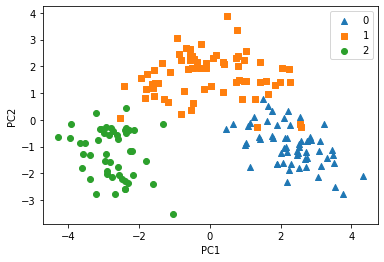

In [22]:
markers = ['^','s','o']
for i in range(3):
    gr_wine = df.groupby('target').get_group(i)
    plt.scatter(gr_wine.PC1,gr_wine.PC2, label = i, marker = markers[i])

plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()